In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Importing Data from kaggle

In [ ]:
# Upload your Kaggle API key (kaggle.json)
from google.colab import files
uploaded = files.upload()

#kaggle folder
!mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# Download the dataset My Drive
! kaggle datasets download -d "matthewjansen/ucf101-action-recognition" -p /content/drive/MyDrive

Saving kaggle.json to kaggle.json
100% 6.52G/6.53G [01:33<00:00, 64.2MB/s]
100% 6.53G/6.53G [01:33<00:00, 75.2MB/s]


In [ ]:
# Import the required libraries.
import os
import cv2
import math
import random
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


In [ ]:
# unzip ucf101-action-recognition.zip file
with zipfile.ZipFile('/content/drive/MyDrive/ucf101-action-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

## **Exploring the Data**

In [ ]:
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('/content/train')

# Generate a list of 20 random values. The values will be between 0-50,
# where 50 is the total number of class in the dataset.
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'/content/train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'/content/train/{selected_class_Name}/{selected_video_file_name}')

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# data paths for train, test and val csv
train_csv = pd.read_csv("/content/train.csv")
test_csv = pd.read_csv("/content/test.csv")
val_csv = pd.read_csv("/content/val.csv")


In [ ]:
# View first 4 rows of train_csv
train_csv.head()

,clip_name,clip_path,label
0,v_Swing_g05_c02,/train/Swing/v_Swing_g05_c02.avi,Swing
1,v_Swing_g21_c03,/train/Swing/v_Swing_g21_c03.avi,Swing
2,v_Swing_g07_c01,/train/Swing/v_Swing_g07_c01.avi,Swing
3,v_Swing_g24_c04,/train/Swing/v_Swing_g24_c04.avi,Swing
4,v_Swing_g20_c03,/train/Swing/v_Swing_g20_c03.avi,Swing


* Number of videos contains in each category in traianing dataset

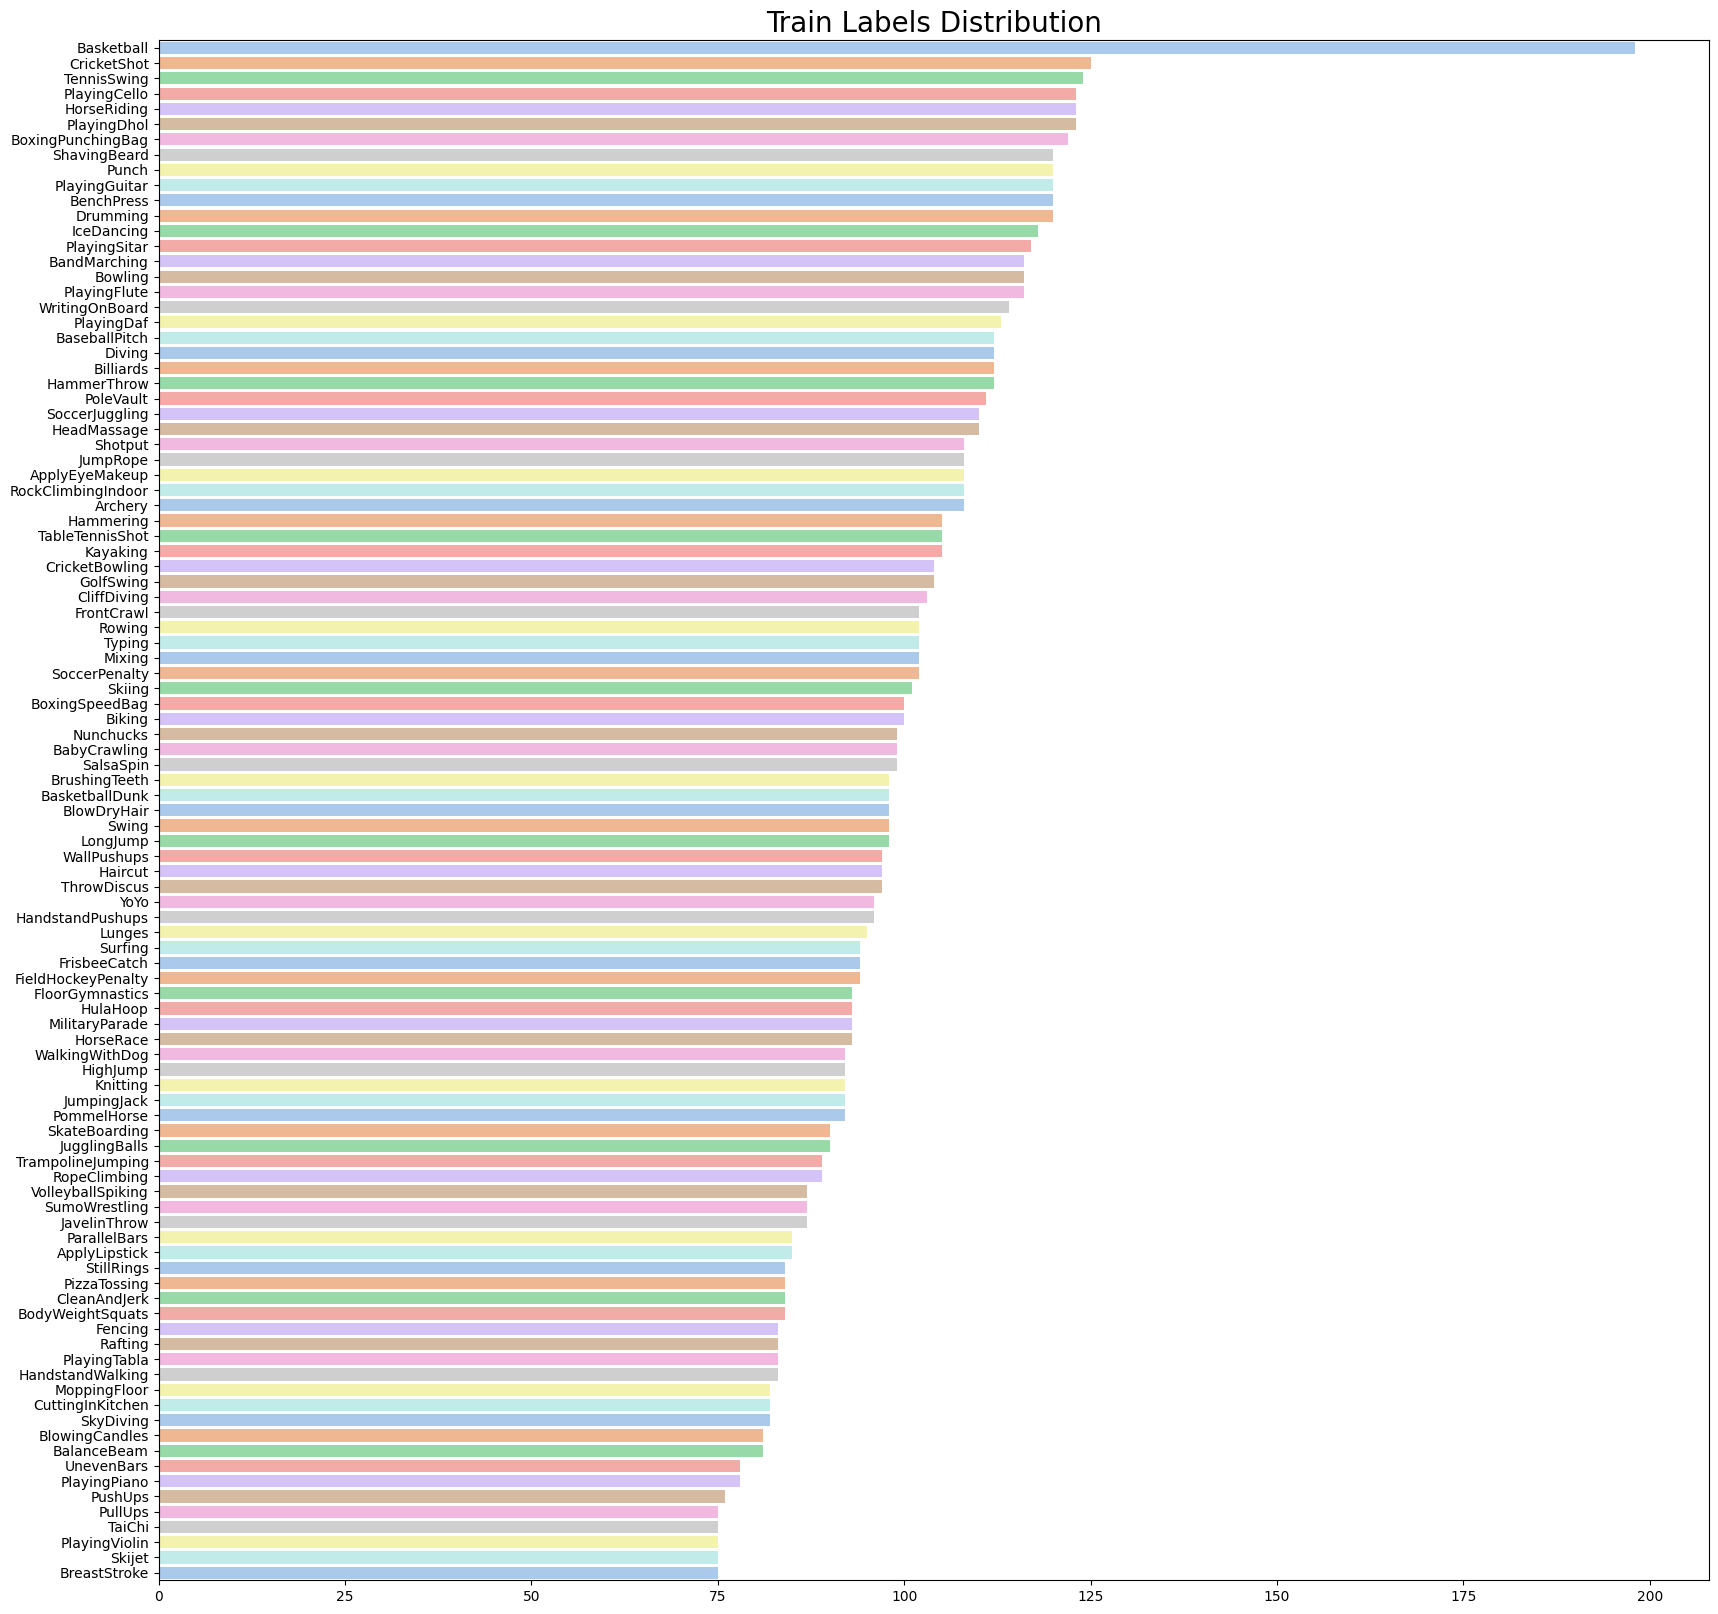

In [ ]:
# View Label Distibutions
plt.figure(figsize=(20, 20))
plt.title('Train Labels Distribution', fontsize=20)
label_distribution = train_csv['label'].value_counts()

sns.barplot(x=label_distribution.values,
            y=list(label_distribution.keys()),
            hue=list(label_distribution.keys()),  # Assigning y to hue
            orient="h",
            palette="pastel",
            legend=False);

* Filtering video categories (ShavingBeard ,Punch, PlayingGuitar,BenchPress, Drumming) from the training dataset.




In [ ]:
# Count occurrences of specific categories
categories = ["ShavingBeard","Punch","PlayingGuitar","BenchPress","Drumming"]
filtered_df = train_csv[train_csv['label'].isin(categories)]
category_counts = filtered_df['label'].value_counts()

# Print or use the counts as needed
print(category_counts)

BenchPress       120
ShavingBeard     120
Punch            120
PlayingGuitar    120
Drumming         120
Name: label, dtype: int64


## **Copying Training Data files**

In [ ]:
# Copying Training Data files from UCF101_Action_Recognition_Data and storing it in drive
# Traing dataset path
destination_folder_path = '/content/drive/MyDrive/UCF101_Action_Recognition_Data/train'


# BenchPress
# Source and destination paths
source_folder_path_BenchPress = '/content/train/BenchPress'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_BenchPress)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_BenchPress, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("BenchPress Files copied successfully.")


####################

# ShavingBeard
# Source and destination paths
source_folder_path_ShavingBeard = '/content/train/ShavingBeard'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_ShavingBeard)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_ShavingBeard, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("ShavingBeard Files copied successfully.")

####################

# Punch
# Source and destination paths
source_folder_path_Punch = '/content/train/Punch'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Punch)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Punch, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Punch Files copied successfully.")

####################

# PlayingGuitar
# Source and destination paths
source_folder_path_PlayingGuitar = '/content/train/PlayingGuitar'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_PlayingGuitar)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_PlayingGuitar, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("PlayingGuitar Files copied successfully.")

####################

# Drumming
# Source and destination paths
source_folder_path_Drumming = '/content/train/Drumming'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Drumming)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Drumming, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Drumming Files copied successfully.")

BenchPress Files copied successfully.
ShavingBeard Files copied successfully.
Punch Files copied successfully.
PlayingGuitar Files copied successfully.
Drumming Files copied successfully.


## **Copying Test Data files**

In [ ]:
# Copying Test Data files from UCF101_Action_Recognition_Data and storing it in drive
# Traing dataset path
destination_folder_path = '/content/drive/MyDrive/UCF101_Action_Recognition_Data/test'


# BenchPress
# Source and destination paths
source_folder_path_BenchPress = '/content/test/BenchPress'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_BenchPress)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_BenchPress, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("BenchPress Files copied successfully.")


####################

# ShavingBeard
# Source and destination paths
source_folder_path_ShavingBeard = '/content/test/ShavingBeard'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_ShavingBeard)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_ShavingBeard, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("ShavingBeard Files copied successfully.")

####################

# Punch
# Source and destination paths
source_folder_path_Punch = '/content/test/Punch'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Punch)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Punch, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Punch Files copied successfully.")

####################

# PlayingGuitar
# Source and destination paths
source_folder_path_PlayingGuitar = '/content/test/PlayingGuitar'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_PlayingGuitar)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_PlayingGuitar, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("PlayingGuitar Files copied successfully.")

####################

# Drumming
# Source and destination paths
source_folder_path_Drumming = '/content/test/Drumming'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Drumming)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Drumming, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Drumming Files copied successfully.")

BenchPress Files copied successfully.
ShavingBeard Files copied successfully.
Punch Files copied successfully.
PlayingGuitar Files copied successfully.
Drumming Files copied successfully.


## **Copying test Data files**

* Validation datset in the original dataset is small, due to this our model doesn't generalize well(overfitting). Therefore, we decided to increase the number of videos by combining validation data into test dataset.

In [ ]:
# Copying validation Data files from UCF101_Action_Recognition_Data and storing it in drive
# Test dataset path
destination_folder_path = '/content/drive/MyDrive/UCF101_Action_Recognition_Data/test'


# BenchPress
# Source and destination paths
source_folder_path_BenchPress = '/content/val/BenchPress'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_BenchPress)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_BenchPress, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("BenchPress Files copied successfully.")


####################

# ShavingBeard
# Source and destination paths
source_folder_path_ShavingBeard = '/content/val/ShavingBeard'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_ShavingBeard)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_ShavingBeard, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("ShavingBeard Files copied successfully.")

####################

# Punch
# Source and destination paths
source_folder_path_Punch = '/content/val/Punch'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Punch)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Punch, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Punch Files copied successfully.")

####################

# PlayingGuitar
# Source and destination paths
source_folder_path_PlayingGuitar = '/content/val/PlayingGuitar'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_PlayingGuitar)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_PlayingGuitar, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("PlayingGuitar Files copied successfully.")

####################

# Drumming
# Source and destination paths
source_folder_path_Drumming = '/content/val/Drumming'
# List all files in the source folder
files_to_copy = os.listdir(source_folder_path_Drumming)

# Iterate through the files and copy them to the destination folder
for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder_path_Drumming, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy(source_file_path, destination_file_path)
print("Drumming Files copied successfully.")

BenchPress Files copied successfully.
ShavingBeard Files copied successfully.
Punch Files copied successfully.
PlayingGuitar Files copied successfully.
Drumming Files copied successfully.


## **Filtering categories from train,test and val csv files**

* Adding video extension for every video, in order to create a data path.

In [ ]:
# Add ".avi" to the end of each entry in the specified column
clip_name = 'clip_name'
train_csv[clip_name] = train_csv[clip_name].astype(str) + ".avi"

# Add ".avi" to the end of each entry in the specified column
test_csv[clip_name] = test_csv[clip_name].astype(str) + ".avi"

# Add ".avi" to the end of each entry in the specified column
val_csv[clip_name] = val_csv[clip_name].astype(str) + ".avi"


In [ ]:
# Selecting the colun that are necessay for the classification
DF_train = train_csv[['clip_name', 'label']]
DF_test = test_csv[['clip_name', 'label']]
DF_val = val_csv[['clip_name', 'label']]

In [ ]:
# Filter based on a set of names
name_set =  ["ShavingBeard","Punch","PlayingGuitar","BenchPress","Drumming"]
DF_train = DF_train[DF_train['label'].isin(name_set)]
DF_test = DF_test[DF_test['label'].isin(name_set)]
DF_val = DF_val[DF_val['label'].isin(name_set)]

In [ ]:
# Concatenate the two DataFrames along the rows (axis=0)
combined_df = pd.concat([DF_test, DF_val], ignore_index=True)

In [ ]:
# Number of videos in test data for filtered video categories
category_counts = combined_df['label'].value_counts()
category_counts

ShavingBeard     41
Drumming         41
BenchPress       40
Punch            40
PlayingGuitar    40
Name: label, dtype: int64

In [ ]:
# Save the subset DataFrame to a new CSV file in Google Drive
DF_train.to_csv('/content/drive/MyDrive/UCF101_Action_Recognition_Data/train.csv', index=False)
combined_df.to_csv('/content/drive/MyDrive/UCF101_Action_Recognition_Data/test.csv', index=False)


In [ ]:
# Data is zipped into a file
path = '/content/drive/MyDrive/UCF101_Action_Recognition_Data'

zip_file = '/content/drive/MyDrive/UCF101_Action_Recognition_Data.zip'

# Zip the file or folder
shutil.make_archive(zip_file.split('.zip')[0], 'zip', path)

'/content/drive/MyDrive/UCF101_Action_Recognition_Data.zip'